# Main notebook for the algorithm development and enhancement

In [1]:
# Required packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

# allowing all the columns to be visualized
pd.options.display.max_columns = None

# rendering all graphics straight out of the notebook
%matplotlib inline

In [8]:
tracks = pd.read_json("data/tracks.json")
tracks.head(2)

,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,24kGoldn,Mood (feat. iann dior),3tjFYV6RSFtuktYl3ZtYcq,99,0.70,0.722,7,-3.558,0,0.0369,0.221,0.0,0.272,0.756,90.989,140526,4
1,Ariana Grande,34+35,6Im9k8u9iIzKMrmV7BWtlF,97,0.83,0.585,0,-6.476,1,0.0940,0.237,0.0,0.248,0.485,109.978,173711,4


In [9]:
BL = pd.read_csv("data/brendan-spotify.csv")
NL = pd.read_csv("data/nick-spotify.csv")
BT = pd.read_csv("data/btam-spotify.csv")
DD = pd.read_csv("data/danica-spotify.csv")
TLC = pd.read_csv("data/toma-spotify.csv")

frames = [BL,NL,BT,DD,TLC]
friends = pd.concat(frames).reset_index(drop=True) 
friends.head(2)

,Song,Artist,Genre,Year,added,bpm,energy,dance,dB,liveliness,valence,duration,acousticness,speechiness,popularity
0,Sooner Or Later,Aaron Carter,dance pop,2018,2021‑01‑06,112,73,74,-7,7,44,213,12,4,49
1,This is the Place,Tom Grennan,indie anthem-folk,2020,2021‑01‑05,142,62,65,-5,9,46,186,32,3,68


In [10]:
tracks['danceability'] = 100 * tracks['danceability']
tracks['energy'] = 100 * tracks['energy']
tracks['speechiness'] = 100 * tracks['speechiness']
tracks['acousticness'] = 100 * tracks['acousticness']
tracks['liveness'] = 100 * tracks['liveness']
tracks['valence'] = 100 * tracks['valence']

In [11]:
# Cleaning and prepping data

tracks = tracks.drop(columns=['track_id', 'key', 'mode', 'time_signature', 'duration_ms','instrumentalness'])
# print(f1.head(2))

# Rename certain columns
friends = friends.rename(columns={"Song": "track_name", 
                            "Artist": "artist_name", 
                            "dance": "danceability", 
                            "dB": "loudness",
                            "bpm": "tempo",
                            "liveliness":"liveness",
                            })

# Rearrange to match order of master set
friends = friends[['artist_name', 
                           'track_name',
                           'popularity',
                           'danceability',
                           'energy',
                           'speechiness',
                           'acousticness',
                           'liveness',
                           'valence',
                           'tempo',]]
# print("\n\n",personal_df.head(2))


In [12]:
# Concatenate the datasets
master = pd.concat([tracks, friends])
master = master.drop_duplicates(subset=['track_name','artist_name'], keep='first', inplace=False, ignore_index=False )

# shape of the dataset
print("Data Frame Dimensions:")
print("Lines:\t\t{}".format(master.shape[0]))
print("Columns:\t{}".format(master.shape[1]))

# Verify no missing data
print(master.info())

Data Frame Dimensions:
Lines:		19548
Columns:	11
<class 'pandas.core.frame.DataFrame'>
Int64Index: 19548 entries, 0 to 3694
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   artist_name   19548 non-null  object 
 1   track_name    19548 non-null  object 
 2   popularity    19548 non-null  int64  
 3   danceability  19548 non-null  float64
 4   energy        19548 non-null  float64
 5   loudness      17630 non-null  float64
 6   speechiness   19548 non-null  float64
 7   acousticness  19548 non-null  float64
 8   liveness      19548 non-null  float64
 9   valence       19548 non-null  float64
 10  tempo         19548 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 1.8+ MB
None


,artist_name,track_name,popularity,danceability,energy,loudness,speechiness,acousticness,liveness,valence,tempo
0,24kGoldn,Mood (feat. iann dior),99,70.0,72.2,-3.558,3.69,22.1,27.20,75.6,90.989
1,Ariana Grande,34+35,97,83.0,58.5,-6.476,9.40,23.7,24.80,48.5,109.978
2,Ariana Grande,positions,99,73.7,80.2,-4.771,8.78,46.8,9.31,68.2,144.015
3,CJ,Whoopty,96,71.1,59.8,-7.621,18.20,19.0,15.00,73.7,140.175
4,The Kid LAROI,WITHOUT YOU,96,66.2,41.3,-7.357,2.99,21.3,13.40,46.7,93.005


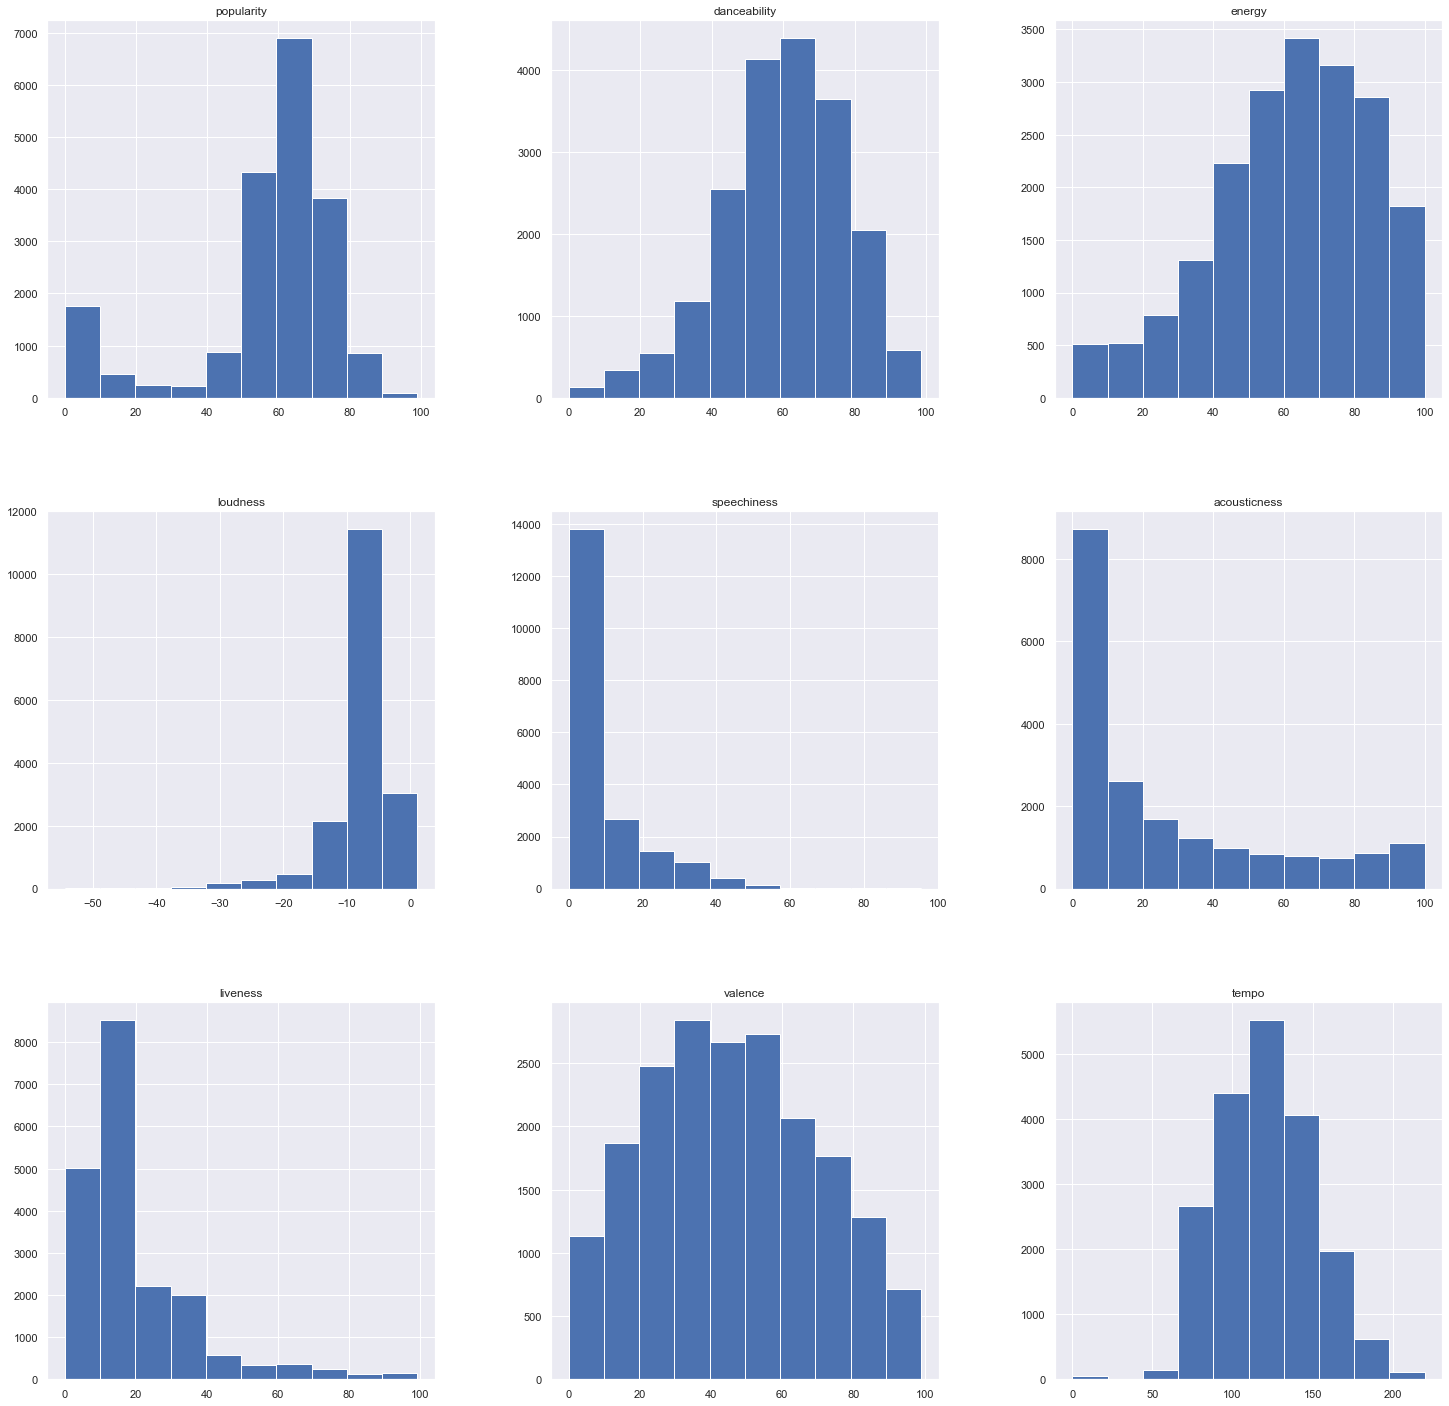

In [14]:
# statistical distribution of categorical values
master.describe(include="O")
master.hist(figsize=(25,25))
master.head()

In [16]:
# checking most recurrent artists
n = 10
print("Most Popular Artists")
master['artist_name'].value_counts()[:n]

Most Popular Artists


Drake            153
Roy Orbison      150
Taylor Swift     128
BTS              110
Robin Trower      96
The Weeknd        95
David Bowie       94
One Direction     92
Mac Miller        87
Ariana Grande     84
Name: artist_name, dtype: int64

In [ ]:
def createGroupTopPlaylist(frames):
    """
    frames: list of the df containing individual song libraries
    """
    playlistLen = 20;
    
    

    
#     df = df.drop_duplicates(subset=['track_name','artist_name'], keep='first', inplace=False, ignore_index=False )
    
    
    
    # Calculates song difference attribute for each song
    df = df.assign(delta=lambda x: 
                       abs(x['energy'] - moodProfile[0]) * weightParams[0]
                       + abs(x['dance'] - moodProfile[1]) * weightParams[1]
                       + abs(x['valence'] - moodProfile[2]) * weightParams[2]
                       + abs(x['popularity']- moodProfile[3]) * weightParams[3]
                  )

In [17]:
topBL = pd.read_json('data/brendan-top-med-track.json')
topBT = pd.read_json('data/btam-top-med-track.json')
topKP = pd.read_json('data/kevin-top-med-track.json')
topRZ = pd.read_json('data/remy-top-med-track.json')

# print(tmp1.head(2), "\n\n", tmp2.head(2), "\n\n", tmp3.head(2))

In [18]:
group_df = pd.concat([topBL,topBT,topKP,topRZ]).reset_index(drop=True)
group_df

,trackName,trackID,popularity,artistName,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,2all,0ZfEeIu7CNHQhbCTiVv3cx,54,Catfish and the Bottlemen,0.396,0.778,7,-3.990,0,0.0718,0.00246,0.002910,0.0952,0.362,166.846,188440
1,Shelter,2CgOd0Lj5MuvOqzqdaAXtS,65,Porter Robinson,0.276,0.796,0,-4.499,1,0.0579,0.00293,0.000000,0.1840,0.260,199.526,218965
2,Take a Walk,4Sfa7hdVkqlM8UW5LsSY3F,69,Passion Pit,0.566,0.755,11,-5.526,1,0.0368,0.03380,0.000000,0.3150,0.445,101.006,264493
3,Escapee,7gMlhlV1AllhpBM8ssg7z6,31,Architecture In Helsinki,0.666,0.743,1,-4.478,1,0.0282,0.03660,0.000001,0.1240,0.726,110.971,178147
4,Longshot,2VcS3oKcOPkubN9LVzZ96l,60,Catfish and the Bottlemen,0.481,0.765,7,-4.025,1,0.0388,0.00381,0.000737,0.1190,0.465,102.829,232960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,REEL IT IN,5qHirGR7M9tdm6C17DlzSY,75,Aminé,0.754,0.342,10,-8.677,0,0.0991,0.07300,0.000000,0.1930,0.423,128.981,121347
196,Language,4RnvS1tmh1ERhjXX6dxv95,59,Paperboy Fabe,0.620,0.721,4,-5.538,0,0.0887,0.04220,0.007500,0.5630,0.770,169.904,150361
197,North Face,63bAGRSSX2V1hhPSP2NpBC,67,ODIE,0.802,0.382,10,-7.356,1,0.0312,0.79200,0.163000,0.0783,0.581,99.969,196800
198,Let Me Know,0dJhXJKZTpiaxTUc7uItIN,64,Brent Faiyaz,0.743,0.548,6,-6.545,0,0.0947,0.17500,0.000180,0.0880,0.558,85.017,215058


In [12]:
playlist = group_df.pivot_table(index=['trackName', 'artistName'], aggfunc='size')
playlist

# dups_color_and_shape = df.pivot_table(index=['Color','Shape'], aggfunc='size')

trackName         artistName               
11:11             TAEYEON                      1
21                Gracie Abrams                1
2all              Catfish and the Bottlemen    1
3 Nights          Dominic Fike                 2
7                 Catfish and the Bottlemen    1
                                              ..
odds              NIKI                         1
skeletons         keshi                        1
talk              keshi                        1
urs               NIKI                         1
why are you here  Machine Gun Kelly            1
Length: 147, dtype: int64

In [19]:
group_df['trackName'].value_counts()[:n]

3 Nights                                                            2
Tongue Tied                                                         2
Daylight                                                            2
Golden                                                              2
Phone Numbers                                                       1
High Hopes                                                          1
All I Want - From "High School Musical: The Musical: The Series"    1
SUPERPOSITION                                                       1
Feelings                                                            1
I Like Me Better                                                    1
Name: trackName, dtype: int64

In [18]:
maxSongOccurence= group_df['trackName'].value_counts()[0]

# group_df.loc[group_df['trackName'].value_counts() == maxSongOccurence, 'added_to_playlist'] = True  
group_df

c:\users\laibr\appdata\local\programs\python\python38\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


IndexingError: (Golden                          True
Daylight                        True
Tongue Tied                     True
3 Nights                        True
Easily                         False
                               ...  
Streetcar                      False
Shoota (feat. Lil Uzi Vert)    False
Lions, Tigers & Bears          False
Selene                         False
Feeling Whitney                False
Name: trackName, Length: 196, dtype: bool, 'added_to_playlist')

## Compliling data and using it to build the correlation matrix to identify the attributes linked to popularity

In [9]:
f1 = pd.read_json("data/SpotifyData.json")

df_BL = pd.read_csv("data/brendan-spotify.csv")
df_NL = pd.read_csv("data/nick-spotify.csv")
df_BT = pd.read_csv("data/btam-spotify.csv")
df_DD = pd.read_csv("data/danica-spotify.csv")
df_TLC = pd.read_csv("data/toma-spotify.csv")

frames = [df_BL, df_NL, df_BT, df_DD, df_TLC]

personal_df = pd.concat(frames).reset_index(drop=True) 
f1 = f1.drop(columns=['track_id', 'key', 'mode', 'time_signature', 'duration_ms','instrumentalness'])

# Rename certain columns
personal_df = personal_df.rename(columns={"Song": "track_name", 
                            "Artist": "artist_name", 
                            "dance": "danceability", 
                            "dB": "loudness",
                            "bpm": "tempo",
                            "liveliness":"liveness",
                            })

# Rearrange to match order of master set
personal_df = personal_df[['artist_name', 
                           'track_name',
                           'popularity',
                           'danceability',
                           'energy',
                           'speechiness',
                           'acousticness',
                           'liveness',
                           'valence',
                           'tempo',]]

df = pd.concat([f1, personal_df])
df = df.drop_duplicates(subset=['track_name','artist_name'], keep='first', inplace=False, ignore_index=False )
df = df.drop(["loudness"], axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F345A6DB50>,
      dtype=object)

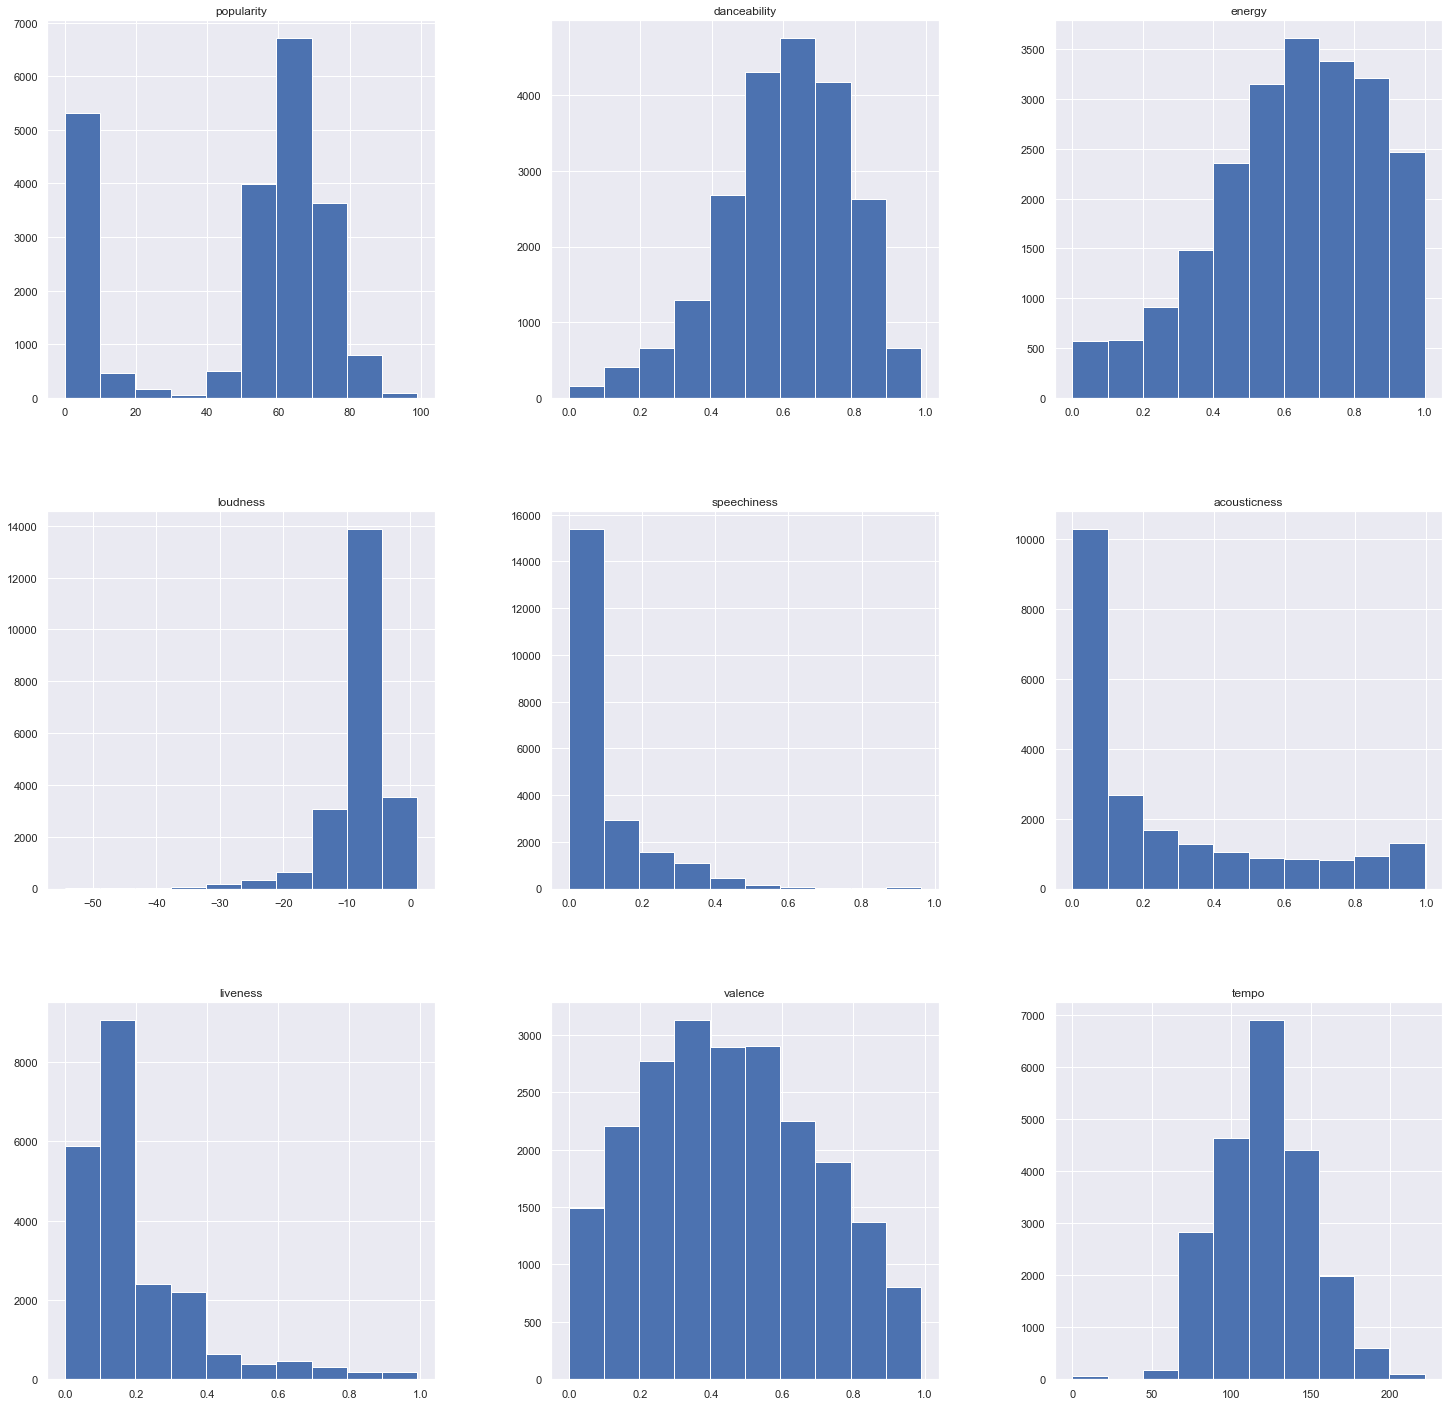

In [13]:
# f1['popularity'].value_counts()[0]
f1.hist(figsize=(25,25))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002E7C5C485E0>,
      dtype=object)

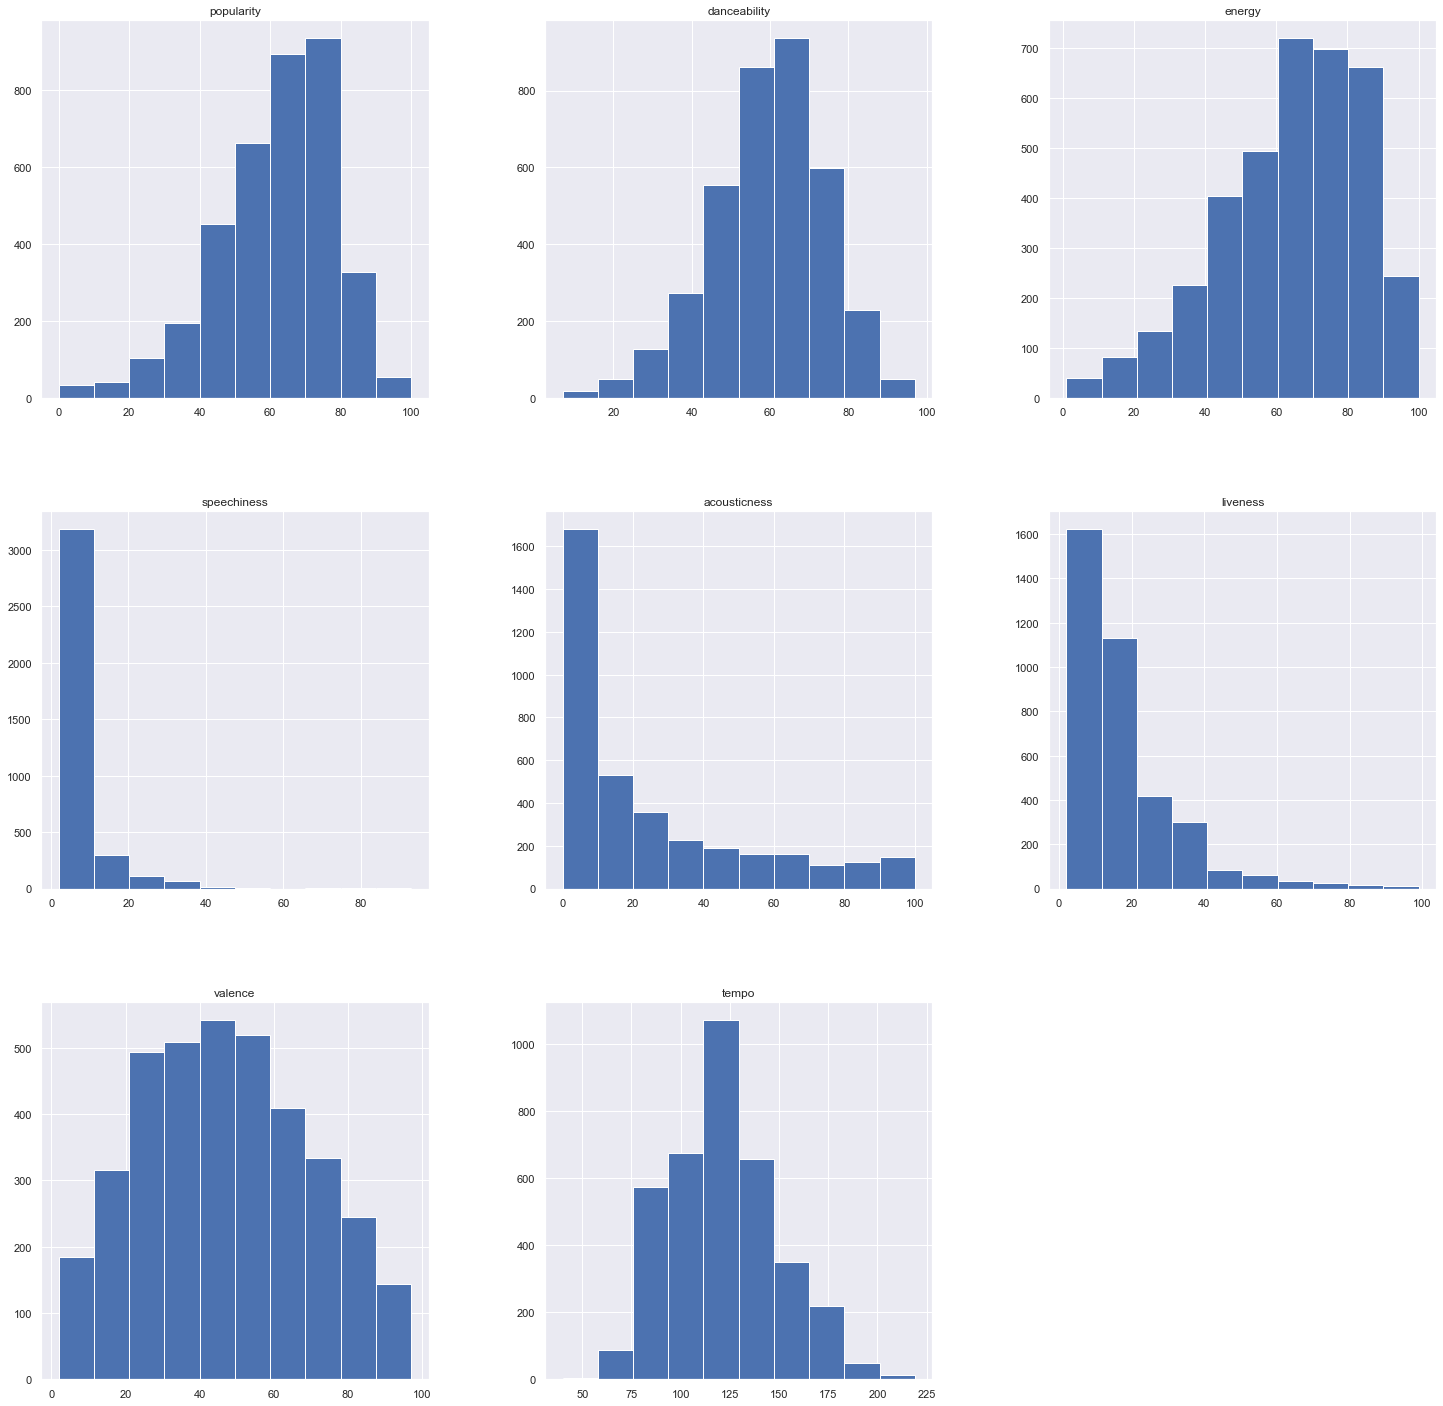

In [12]:
personal_df.hist(figsize=(25,25))

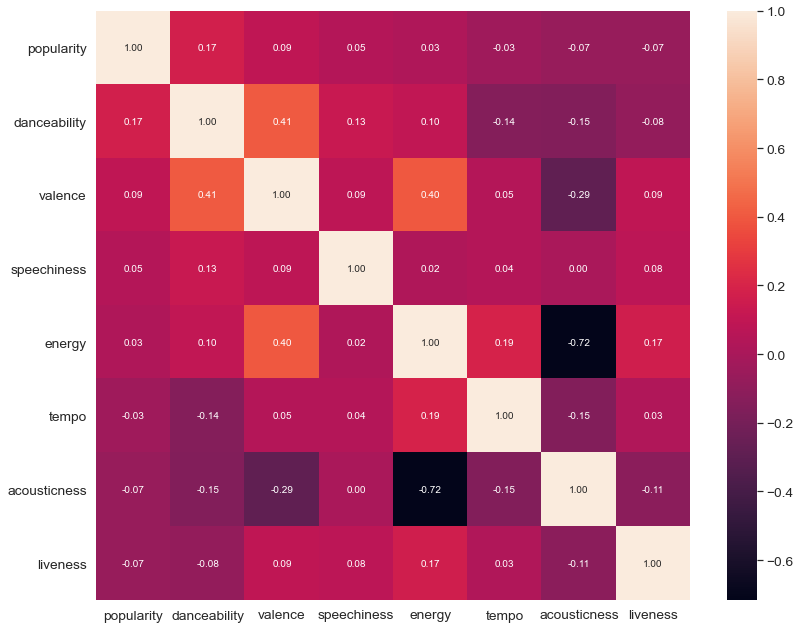

In [16]:
# creating a correlation matrix
corr = personal_df.corr()

# focused heatmap - Popularity
# number of variables to be selected
k = 1000

# finding the most correlated variables
cols = corr.nlargest(k, 'popularity')['popularity'].index
cm = np.corrcoef(personal_df[cols].values.T)

#plotting the heatmap
f, ax = plt.subplots(figsize=(12,9))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.tight_layout()

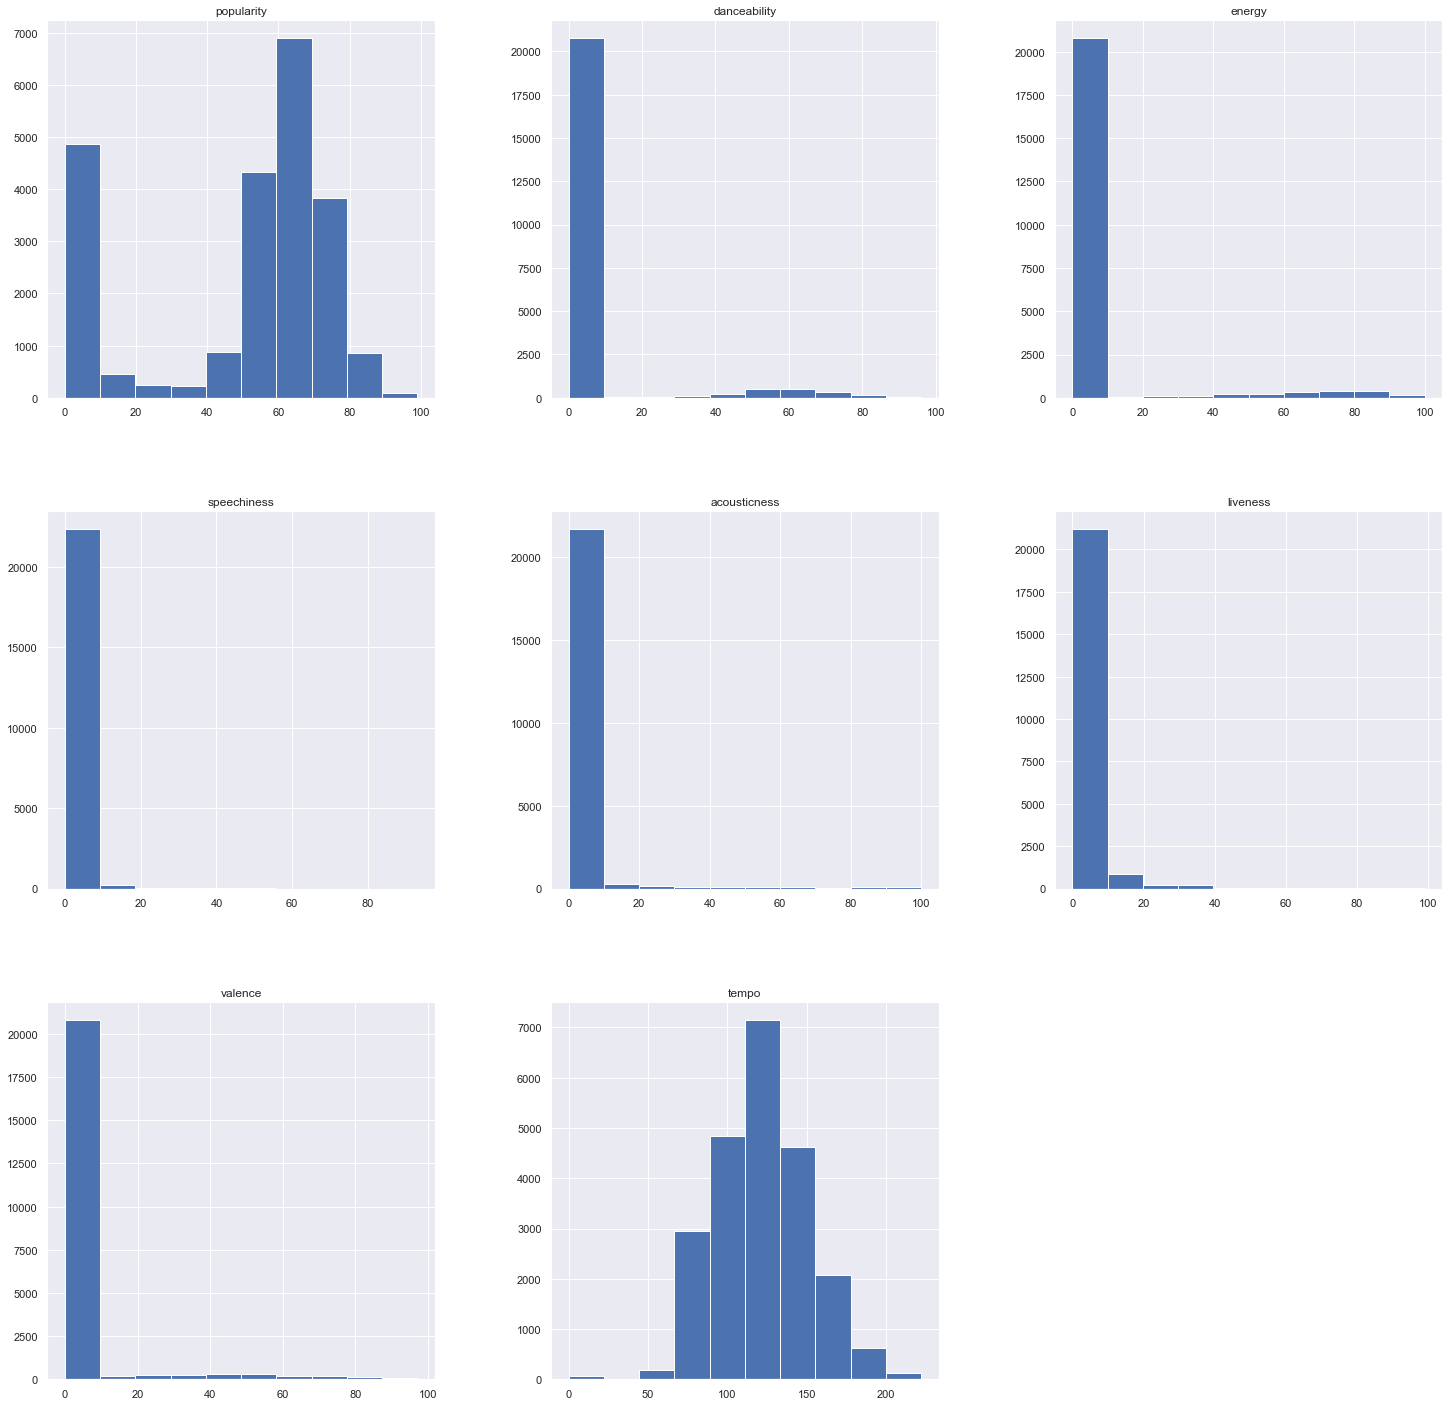

In [10]:
df.hist(figsize=(25,25));